1\. Fodrászonként mekkora Bevételt produkált a szalon, illetve mennyi az össz bevétel

2.Picit bonyolultabban --\> Fodrászonként és szolgáltatásonként a bevétel összege

In [ ]:
select IIF(GROUPING(fodraszok.nev) = 1, 'Összesen', fodraszok.nev) AS 'Fodrász neve',
       SUM(szolgaltatasok.ar*kedvezmeny.szazalek) AS 'Bevétel'
FROM foglalasok join fodraszok on foglalasok.fodrasz_fk = fodraszok.fodrasz_id
				join foglalas_szolgaltatas on foglalasok.foglalas_id = foglalas_szolgaltatas.foglalas_fk
                join szolgaltatasok on foglalas_szolgaltatas.szolgaltatas_fk = szolgaltatasok.szolgaltatas_id
                join kedvezmeny on kedvezmeny.kedvezmeny_id = szolgaltatasok.kedvezmeny_fk
group by rollup(fodraszok.nev)

-------------------------------------------------------------------------------------------------------------------

SELECT IIF(GROUPING_ID(fodraszok.nev) = 1, 'Végösszeg',fodraszok.nev) as 'Fodrász neve',
        CASE 
        when grouping_id(fodraszok.nev, szolgaltatasok.megnevezes) = 1 THEN 'Részösszeg'
        when grouping_id(fodraszok.nev, szolgaltatasok.megnevezes) = 3 THEN 'Végösszeg'
        else szolgaltatasok.megnevezes
        end as 'Szolgáltatás neve',
        SUM(szolgaltatasok.ar*kedvezmeny.szazalek) AS 'Bevétel'
FROM foglalasok join fodraszok on foglalasok.fodrasz_fk = fodraszok.fodrasz_id
				join foglalas_szolgaltatas on foglalasok.foglalas_id = foglalas_szolgaltatas.foglalas_fk
                join szolgaltatasok on foglalas_szolgaltatas.szolgaltatas_fk = szolgaltatasok.szolgaltatas_id
                join kedvezmeny on kedvezmeny.kedvezmeny_id = szolgaltatasok.kedvezmeny_fk
group by rollup(fodraszok.nev,szolgaltatasok.megnevezes)


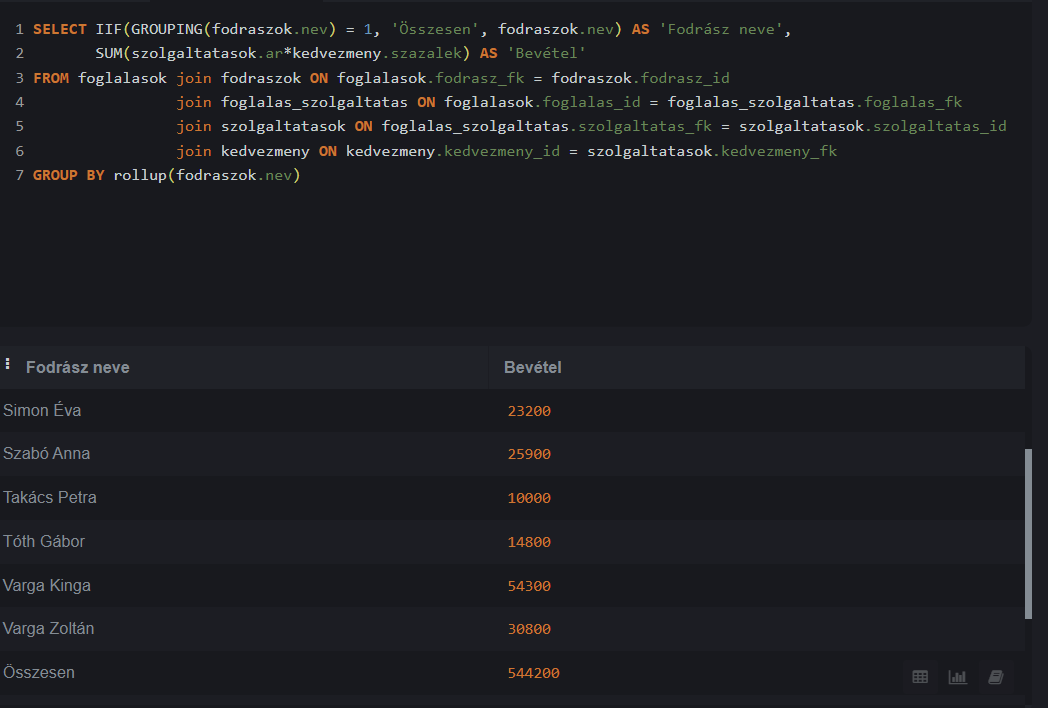

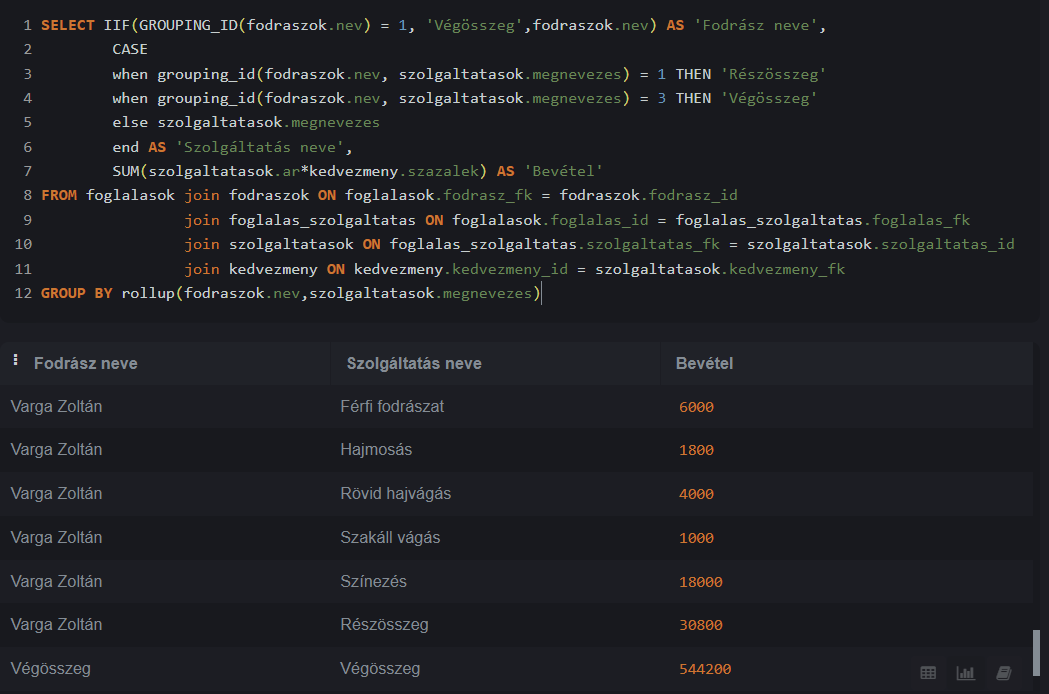